## Introducción

El objetivo de este proyecto se basa en crear modelos de machine para clasificar los elementos argumentativos en los textos escritos por estudiantes como "efectivos", "adecuados" o "ineficaces". Esta clasificación automatizada tiene como objetivo proporcionar una mejor retroalimentación a los estudiantes, para así ellos puedan mejorar sus habilidades de escritura.

---

## 1. Selección de Algoritmos

### Investigación y Selección de Algoritmos

Para abordar el problema de clasificación de elementos argumentativos en textos de estudiantes, se seleccionaron los siguientes cinco algoritmos de Machine Learning:

1. **Logistic Regression**
2. **Random Forest Classifier**
3. **XGBoost**
4. **Red Neuronal (Neural Network) con Keras**
5. **Red Neuronal (Neural Network) con PyTorch**

### Justificación de la Selección

1. **Logistic Regression**:
   - **Características**: Modelo lineal simple que es eficiente y fácil de interpretar.
   - **Justificación**: Adecuado para problemas de clasificación multiclase y sirve como un buen punto de referencia.
   - **Referencia**: [Hosmer, D.W., Lemeshow, S. (2000). Applied Logistic Regression. Wiley.]

2. **Random Forest Classifier**:
   - **Características**: Ensamble de árboles de decisión que maneja bien las interacciones no lineales y la importancia de características.
   - **Justificación**: Eficaz para manejar conjuntos de datos con características complejas y evita el sobreajuste.
   - **Referencia**: [Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.]

3. **XGBoost**:
   - **Características**: Algoritmo de gradiente potenciado que es altamente eficiente y preciso, especialmente en problemas de clasificación y regresión.
   - **Justificación**: Excelente para manejar características de alta dimensionalidad y ofrece mecanismos avanzados de regularización para evitar el sobreajuste.
   - **Referencia**: [Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.]

4. **Red Neuronal (Neural Network) con Keras**:
   - **Características**: Modelos capaces de capturar relaciones complejas y no lineales en los datos mediante múltiples capas de neuronas.
   - **Justificación**: Adecuada para procesamiento de texto y puede aprovechar representaciones de características profundas para mejorar la clasificación.
   - **Referencia**: [Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.]

5. **Red Neuronal (Neural Network) con PyTorch**:
   - **Características**: Similar a las redes neuronales con Keras, pero con mayor flexibilidad y control en el proceso de entrenamiento.
   - **Justificación**: Permite una personalización más detallada del modelo y el proceso de entrenamiento, lo que puede mejorar el rendimiento en tareas específicas.
   - **Referencia**: [Paszke, A., et al. (2019). PyTorch: An Imperative Style, High-Performance Deep Learning Library. Advances in Neural Information Processing Systems.]

---

In [27]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Preprocesamiento e Ingeniería de Características

### Carga de Datos

In [1]:
import pandas as pd

# Cargar los datos preprocesados
train_df = pd.read_csv('data/train_preprocessed.csv')
test_df = pd.read_csv('data/test.csv')

# Visualizar las primeras filas del conjunto de entrenamiento
train_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,text_length,text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317,hi im isaac im going writing face mars natural...
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210,perspective think face natural landform dont t...
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105,think face natural landform life mars descover...
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362,life mars would know reason think natural land...
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101,people thought face formed alieans thought lif...


### Limpieza de Datos

Aunque ya se ha realizado un limpieza previa, esta es solo una medida de seguridad.

In [2]:
# Verificar valores nulos
train_df.isnull().sum()

# Rellenar o eliminar valores nulos si es necesario
train_df = train_df.dropna()

### Ingeniería de Características (Feature Engineering)

1. **Tokenización y Normalización del Texto**:
   - Convertir texto a minúsculas.
   - Eliminar puntuación y caracteres especiales.
   - Tokenizar palabras.

   > Esto fue realizado en la etapa previa (Normalización)

2. **Vectorización**:
   - Utilizar TF-IDF para transformar el texto en vectores numéricos.

3. **Características Adicionales**:
   - Longitud del texto (`text_length`).
   - Número de palabras clave específicas relacionadas con elementos argumentativos.

### Codificación de Etiquetas (Label Encoding)

Antes de dividir los datos, es esencial codificar las etiquetas categóricas en valores numéricos para que los modelos de Scikit-Learn puedan procesarlas correctamente.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
le = LabelEncoder()

# Codificar las etiquetas de clase
y = le.fit_transform(train_df['discourse_effectiveness'])

# Opcional: Verificar la codificación
print(le.classes_)

['Adequate' 'Effective' 'Ineffective']


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Vectorización del texto
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_text = tfidf.fit_transform(train_df['text'])

# Escalar la característica de longitud del texto
scaler = StandardScaler()
X_length = scaler.fit_transform(train_df[['text_length']])

# Discourse type to categorical
# Lead, Position, Claim, Evidence...
# To one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Inicializar el codificador
ohe = OneHotEncoder(drop='first')
X_discourse = ohe.fit_transform(train_df[['discourse_type']])

# Concatenar características
import scipy.sparse as sp
X = sp.hstack([X_text, X_length, X_discourse])

### Justificación de las Técnicas Aplicadas

- **TF-IDF**: Captura la importancia relativa de las palabras en el contexto del corpus, lo que es esencial para entender la efectividad argumentativa.
- **Escalado de Características**: Normaliza la longitud del texto para que no domine otras características durante el entrenamiento del modelo.

---

## 3. Implementación de Modelos

### División de Datos

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Definición de Modelos

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Inicializar modelos tradicionales
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Preparar datos para la Red Neuronal con Keras
# No es necesario re-codificar 'y_train' ya está codificada

# Definir el modelo de Red Neuronal con Keras
def create_nn_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

num_classes = len(le.classes_)
nn_model_keras = create_nn_model(X_train.shape[1], num_classes)
nn_model_keras.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Preparar datos para la Red Neuronal con PyTorch
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X.toarray().astype('float32')
        self.y = y.astype('int64')

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset_pytorch = TextDataset(X_train, y_train)
val_dataset_pytorch = TextDataset(X_val, y_val)

train_loader_pytorch = DataLoader(train_dataset_pytorch, batch_size=128, shuffle=True)
val_loader_pytorch = DataLoader(val_dataset_pytorch, batch_size=128, shuffle=False)

# Definir el modelo de Red Neuronal con PyTorch
class NeuralNetPyTorch(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetPyTorch, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

nn_model_pytorch = NeuralNetPyTorch(X_train.shape[1], num_classes)

### Entrenamiento y Validación Cruzada

#### Modelos Tradicionales

In [34]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Logistic Regression
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression CV Accuracy: {log_reg_cv.mean():.4f}')

# Validación cruzada para Random Forest
rand_forest_cv = cross_val_score(rand_forest, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest CV Accuracy: {rand_forest_cv.mean():.4f}')

# Validación cruzada para XGBoost
xgb_cv = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f'XGBoost CV Accuracy: {xgb_cv.mean():.4f}')

Logistic Regression CV Accuracy: 0.6516
Random Forest CV Accuracy: 0.6417
XGBoost CV Accuracy: 0.6514


#### Red Neuronal con Keras

In [35]:
# Definir Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = nn_model_keras.fit(
    X_train.toarray(), y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_val.toarray(), y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6144 - loss: 0.8828 - val_accuracy: 0.6635 - val_loss: 0.7517
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6986 - loss: 0.6818 - val_accuracy: 0.6593 - val_loss: 0.7603
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7495 - loss: 0.5844 - val_accuracy: 0.6402 - val_loss: 0.7936
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8023 - loss: 0.4870 - val_accuracy: 0.6425 - val_loss: 0.8577
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8576 - loss: 0.3688 - val_accuracy: 0.6302 - val_loss: 0.9790
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9039 - loss: 0.2657 - val_accuracy: 0.6245 - val_loss: 1.1107


#### Red Neuronal con PyTorch

In [36]:
# Definir listas para almacenar las pérdidas y precisiones
train_losses = []
val_losses = []
val_accuracies = []

In [37]:
# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nn_model_pytorch.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model_pytorch.parameters(), lr=0.001)

# Entrenar el modelo
num_epochs = 50
early_stop_counter = 0
best_val_loss = float('inf')
patience = 5

for epoch in range(num_epochs):
    nn_model_pytorch.train()
    running_loss = 0.0
    for inputs, labels in train_loader_pytorch:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model_pytorch(inputs)
        loss = criterion(outputs, labels)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader_pytorch.dataset)
    train_losses.append(epoch_loss)

    # Validación
    nn_model_pytorch.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader_pytorch:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = nn_model_pytorch(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader_pytorch.dataset)
    val_losses.append(val_loss)
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_loss:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {val_accuracy:.4f}')

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        # Guardar el mejor modelo
        torch.save(nn_model_pytorch.state_dict(), 'best_model_pytorch.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping")
            break

# Cargar el mejor modelo
nn_model_pytorch.load_state_dict(torch.load('best_model_pytorch.pth'))

Epoch 1/50 - Train Loss: 0.8259 - Val Loss: 0.7550 - Val Acc: 0.6610
Epoch 2/50 - Train Loss: 0.6992 - Val Loss: 0.7578 - Val Acc: 0.6555
Epoch 3/50 - Train Loss: 0.6336 - Val Loss: 0.7856 - Val Acc: 0.6470
Epoch 4/50 - Train Loss: 0.5628 - Val Loss: 0.8164 - Val Acc: 0.6504
Epoch 5/50 - Train Loss: 0.4754 - Val Loss: 0.8896 - Val Acc: 0.6208
Epoch 6/50 - Train Loss: 0.3800 - Val Loss: 1.0037 - Val Acc: 0.6321
Early stopping


<All keys matched successfully>

### Optimización de Hiperparámetros

#### Modelos Tradicionales

In [38]:
from sklearn.model_selection import GridSearchCV

# Parámetros para Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'saga']
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print(f'Best Logistic Regression Params: {grid_lr.best_params_}')

# Parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rand_forest, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(f'Best Random Forest Params: {grid_rf.best_params_}')

# Parámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print(f'Best XGBoost Params: {grid_xgb.best_params_}')

Best Logistic Regression Params: {'C': 1, 'solver': 'saga'}
Best Random Forest Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


---

## 4. Evaluación y Comparación de Modelos

### Evaluación del Rendimiento

In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Predicciones
y_pred_lr = grid_lr.predict(X_val)
y_pred_rf = grid_rf.predict(X_val)
y_pred_xgb = grid_xgb.predict(X_val)

# Predicciones de la Red Neuronal con Keras
y_pred_nn_prob_keras = nn_model_keras.predict(X_val.toarray())
y_pred_nn_keras = y_pred_nn_prob_keras.argmax(axis=1)  # Mantener etiquetas numéricas

# Predicciones de la Red Neuronal con PyTorch
nn_model_pytorch.eval()
y_pred_nn_pytorch = []
with torch.no_grad():
    for inputs, _ in val_loader_pytorch:
        inputs = inputs.to(device)
        outputs = nn_model_pytorch(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred_nn_pytorch.extend(predicted.cpu().numpy())

# Ahora, y_pred_nn_pytorch ya está en formato numérico

# Reportes de clasificación
print("Logistic Regression Classification Report")
print(classification_report(y_val, y_pred_lr, target_names=le.classes_))

print("Random Forest Classification Report")
print(classification_report(y_val, y_pred_rf, target_names=le.classes_))

print("XGBoost Classification Report")
print(classification_report(y_val, y_pred_xgb, target_names=le.classes_))

print("Neural Network (Keras) Classification Report")
print(classification_report(y_val, y_pred_nn_keras, target_names=le.classes_))

print("Neural Network (PyTorch) Classification Report")
print(classification_report(y_val, y_pred_nn_pytorch, target_names=le.classes_))


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Logistic Regression Classification Report
              precision    recall  f1-score   support

    Adequate       0.66      0.84      0.74      4211
   Effective       0.66      0.52      0.58      1873
 Ineffective       0.50      0.21      0.29      1268

    accuracy                           0.65      7352
   macro avg       0.61      0.52      0.54      7352
weighted avg       0.63      0.65      0.62      7352

Random Forest Classification Report
              precision    recall  f1-score   support

    Adequate       0.64      0.91      0.75      4211
   Effective       0.70      0.43      0.54      1873
 Ineffective       0.64      0.12      0.20      1268

    accuracy                           0.65      7352
   macro avg       0.66      0.49      0.50      7352
weighted avg       0.66      0.65      0.60      7352

XGBoost Classification Report
              precision    recall  f1-score   support

    Adequate       0.64      0.91 

In [40]:
from sklearn.dummy import DummyClassifier

# Modelo base: Estrategia de la clase más frecuente
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_val)

print("Baseline Model Classification Report")
print(classification_report(y_val, y_dummy, target_names=le.classes_))

Baseline Model Classification Report
              precision    recall  f1-score   support

    Adequate       0.57      1.00      0.73      4211
   Effective       0.00      0.00      0.00      1873
 Ineffective       0.00      0.00      0.00      1268

    accuracy                           0.57      7352
   macro avg       0.19      0.33      0.24      7352
weighted avg       0.33      0.57      0.42      7352



---

## 5. Visualización y Comunicación de Resultados

### Matriz de Confusión

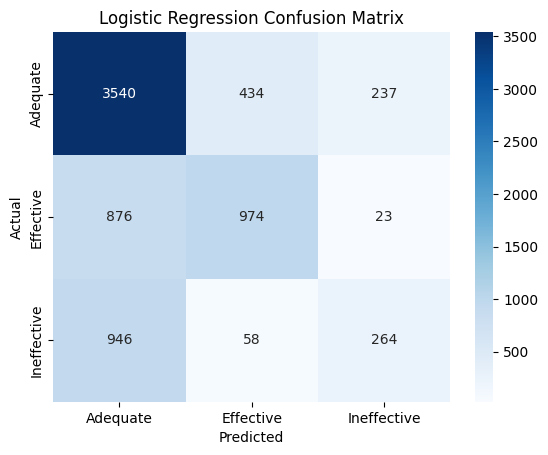

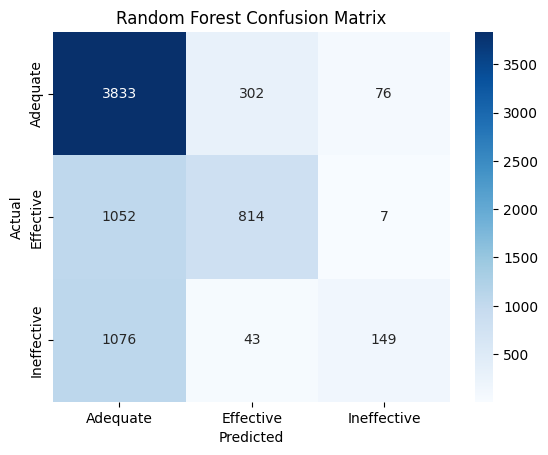

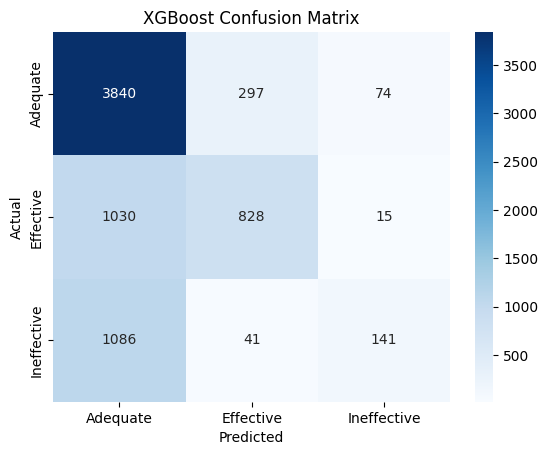

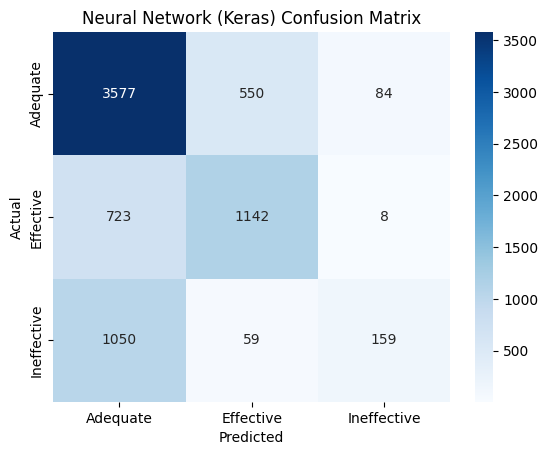

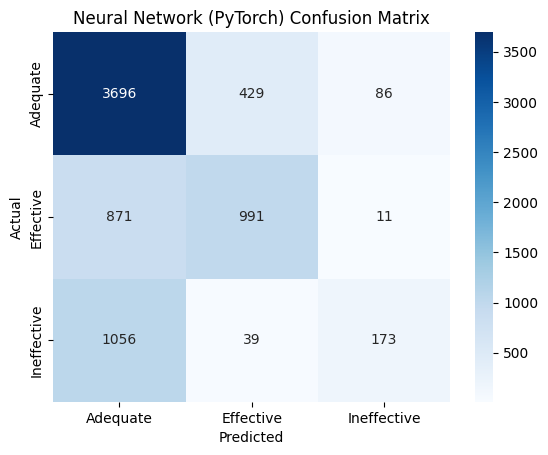

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Función para plotear matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

# Matrices de confusión
plot_confusion(y_val, y_pred_lr, 'Logistic Regression Confusion Matrix')
plot_confusion(y_val, y_pred_rf, 'Random Forest Confusion Matrix')
plot_confusion(y_val, y_pred_xgb, 'XGBoost Confusion Matrix')
plot_confusion(y_val, y_pred_nn_keras, 'Neural Network (Keras) Confusion Matrix')
plot_confusion(y_val, y_pred_nn_pytorch, 'Neural Network (PyTorch) Confusion Matrix')

### Importancia de Características (Random Forest y XGBoost)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los nombres de todas las características
tfidf_features = tfidf.get_feature_names_out()
additional_features = ['text_length']
all_feature_names = np.concatenate([tfidf_features, additional_features])

# Importancia de características para Random Forest
importances_rf = grid_rf.best_estimator_.feature_importances_
indices_rf = np.argsort(importances_rf)[-10:]  # Top 10 características

# Obtener los nombres de las características
top_features_rf = [all_feature_names[i] for i in indices_rf]

# Plotear importancia de características - Random Forest
plt.figure(figsize=(10,6))
plt.title('Top 10 Feature Importances - Random Forest')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), top_features_rf)
plt.xlabel('Importancia')
plt.show()

# Importancia de características para XGBoost
importances_xgb = grid_xgb.best_estimator_.feature_importances_
indices_xgb = np.argsort(importances_xgb)[-10:]  # Top 10 características

# Obtener los nombres de las características
top_features_xgb = [all_feature_names[i] for i in indices_xgb]

# Plotear importancia de características - XGBoost
plt.figure(figsize=(10,6))
plt.title('Top 10 Feature Importances - XGBoost')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], color='g', align='center')
plt.yticks(range(len(indices_xgb)), top_features_xgb)
plt.xlabel('Importancia')
plt.show()

IndexError: index 5003 is out of bounds for axis 0 with size 5001

### Comparación de Métricas de Rendimiento

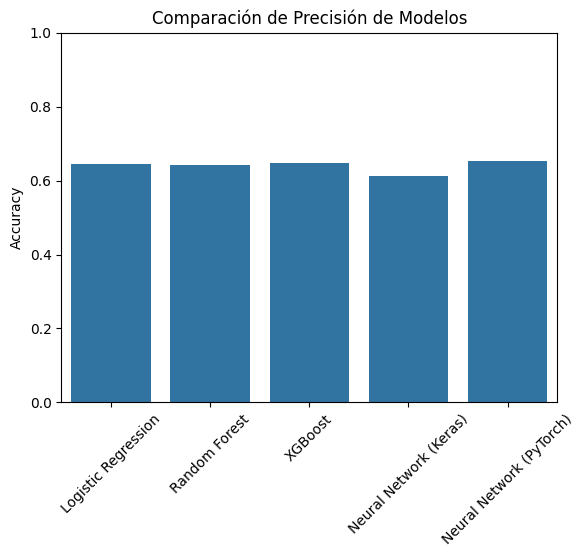

In [ ]:
# Comparar precisión
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network (Keras)', 'Neural Network (PyTorch)', 'Baseline']
accuracies = [
    accuracy_score(y_val, y_pred_lr),
    accuracy_score(y_val, y_pred_rf),
    accuracy_score(y_val, y_pred_xgb),
    accuracy_score(y_val, y_pred_nn_keras),
    accuracy_score(y_val, y_pred_nn_pytorch),
    accuracy_score(y_val, y_dummy)
]

sns.barplot(x=models, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Comparación de Precisión de Modelos')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

### Curvas de Aprendizaje para la Red Neuronal con Keras

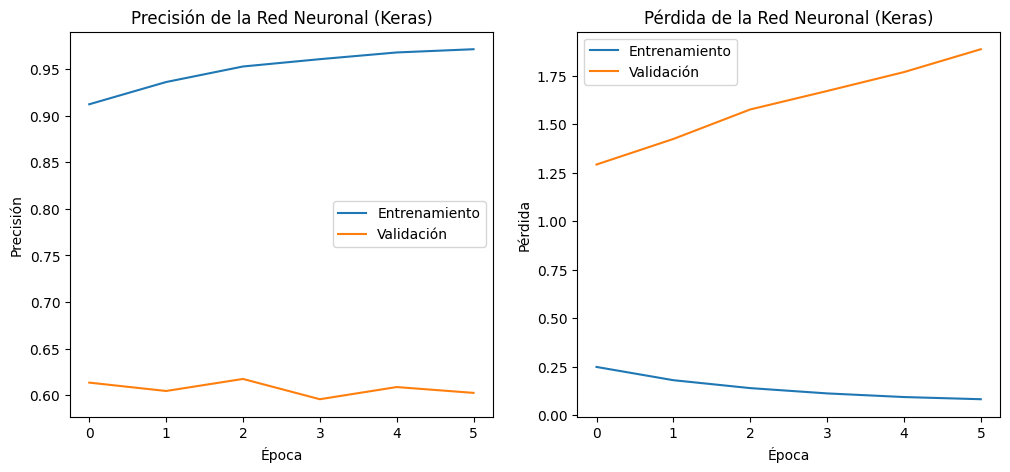

In [ ]:
# Plotear curvas de entrenamiento y validación
plt.figure(figsize=(12,5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión de la Red Neuronal (Keras)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida de la Red Neuronal (Keras)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

### Curvas de Entrenamiento para la Red Neuronal con PyTorch

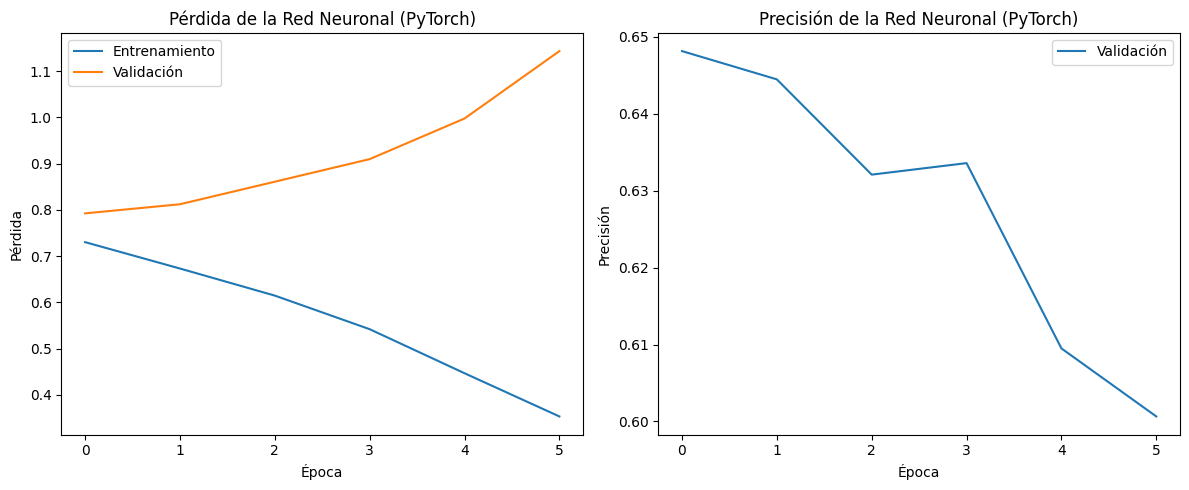

In [ ]:
import matplotlib.pyplot as plt

# Plotear curvas de entrenamiento y validación para PyTorch
plt.figure(figsize=(12,5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Entrenamiento')
plt.plot(val_losses, label='Validación')
plt.title('Pérdida de la Red Neuronal (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validación')
plt.title('Precisión de la Red Neuronal (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()